# 1. Newton Raphson Method(Bi Variable) For Finding Local Maxima/Minima

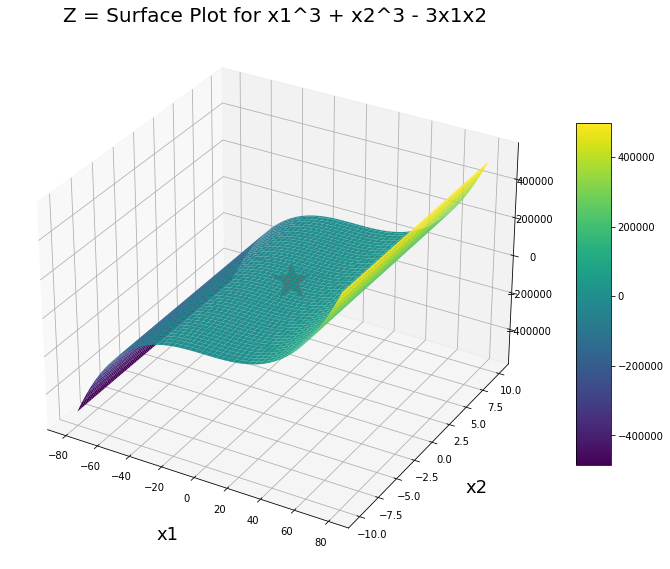

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

def func(x1,x2):
    """
    Summary: returns function value
    Args:
        x1 - variable x1 , type-float
        x2 - variable x2 , type-float
    Author: Lalith    
    """
    return x1**3 + x2**3 -3*x1*x2
def g(x1,x2):
    """
    Summary: returns g(xk) i.e a 2 by 1 matrix
    Args:
        x1 - variable x1 , type-float
        x2 - variable x2 , type-float
    Author: Lalith    
    """
    return([[3*x1**2 - 3*x2],[3*x2**2 - 3*x1]])
def gj(x1,x2):
    """
    Summary: returns delg(xk) i.e a 2 by 2 matrix
    Args:
        x1 - variable x1 , type-float
        x2 - variable x2 , type-float
    Author: Lalith    
    """
    return([[6*x1,-3],[-3,6*x2]])

def newton_raphson(x0,err,itr): 
    """
    Summary: returns a point at which there exists a local minima/maxima for the function func
    Args:
        x0 - initial point , type - 2 by 1 matrix
        err - error , type - float
        itr - number of iterations , type - int
    Author: Lalith    
    """
    gxk = g(x0[0][0],x0[1][0])
    jk = gj(x0[0][0],x0[1][0])
    jkinv = np.linalg.inv(jk)
    product = np.matmul(jkinv,gxk)
    x1 = np.subtract(x0,product)
    dist = np.linalg.norm(x1-x0)
    x0 = x1
    count = 1
    while(dist>=err and count<=itr):
        gxk = g(x0[0][0],x0[1][0])
        jk = gj(x0[0][0],x0[1][0])
        jkinv = np.linalg.inv(jk)
        product = np.matmul(jkinv,gxk)
        x1 = np.subtract(x0,product)
        dist = np.linalg.norm(x1-x0)
        x0 = x1
        count = count +1
    
    return x0  
      

x0=[[3],[4]]
x1 = newton_raphson(x0,0.1,100)
a = x1[0][0]
b = x1[1][0]
c = func(x1[0][0],x1[1][0])


# plotting
fig= plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x1 = np.linspace(-80,80,100)
x2 = np.linspace(-10,10,100)

X, Y = np.meshgrid(x1,x2)
Z = X**3 + Y**3 -3*X*Y

surf = ax.plot_surface(X,Y,Z, cmap= plt.cm.viridis)

# set axes label
ax.set_xlabel('x1', labelpad=20,fontsize='18')
ax.set_ylabel('x2', labelpad=20,fontsize='18')
ax.set_zlabel('z', labelpad=20,fontsize='18')
ax.set_title('Z = Surface Plot for x1^3 + x2^3 - 3x1x2',pad=2,fontsize='20')
ax.scatter(a,b,c,s=1400,c='red',marker='*')

fig.colorbar(surf, shrink=.63, aspect=10) # adding colorbar

plt.show()

<h3>INFERENCE: So from the figure above,it looks like there exists a local minima at that star!</h3>

# 2.Golden Section


Iterations 1000000 Got Over!, Give more iterations for more convergence!


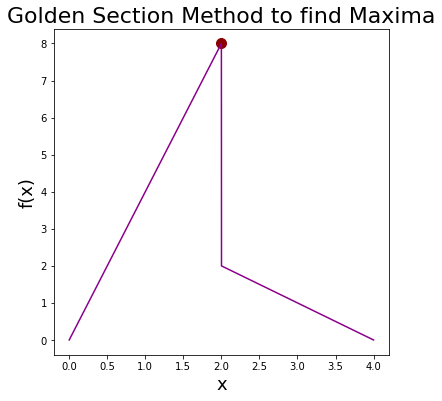

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math


def f(x):
    """
    Summary: returns value of the function for a given point x
    Args:
        x - x value , type - float
    Author: Lalith    
    """
    if(0<=x and x<=2):
        return 4*x
    elif(2<x and x<=4):
        return 4-x
    else:
        return (f'function is not defined at {x}!')

def gs(xl,xr,itr,err):
    """
    Summary: returns point at which there exists extremum
    Args:
        xl - intervals start value, type - int/float
        xr - intervals end value, type - int/float
        itr - number of iterations , type - int
        err - error , type - float
    Author: Lalith    
    """
    delta = (np.sqrt(5)-1)/2
    x1 = xr - delta*(xr-xl)
    x2 = xl + delta*(xr-xl)
    count=0
    while(abs(x1-x2)>=err and count<itr):
        if(f(x1)>f(x2)):
            x2 = xl+delta*(xr-xl)
        elif(f(x2)>f(x1)):
            x1 = xl-delta*(xr-xl)
        else:
            x1 = xl-delta*(xr-xl)
            x2 = xl+delta*(xr-xl)
        count+=1
    if(abs(x1-x2)>=err):
        print(f"\nIterations {itr} Got Over!, Give more iterations for more convergence!")
    return ((x1+x2)/2)    

x = np.linspace(0,4,100000)
y=[]
for i in range(len(x)):
    y.append(f(x[i]))


ans = gs(0,4,1000000,0.1)     
f_ans = f(ans)

plt.figure(figsize=(6,6))
plt.plot(x,y,color='darkmagenta')
plt.xlabel('x',fontsize=18)
plt.ylabel('f(x)',fontsize=18)
plt.title('Golden Section Method to find Maxima',fontsize=22)
plt.scatter(ans,f_ans,c='darkred',s=100,marker='o')
plt.show()

<h3>INFERENCE: So we can find the local Maxima at the circle from the above picture!</h3>

# 3.Gradient Descent Uni-Variate


-0.4


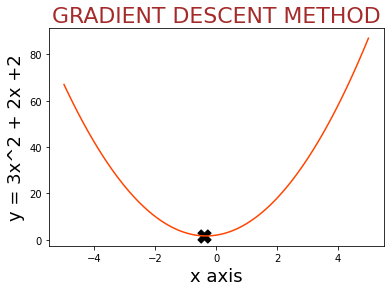

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

def gd(x0,itr,err,lr):
    """
    Summary: returns point at which there exists local minima
    Args:
        x0 - initial point  , type - int/float
        itr - number of iterations , type - int
        lr - learning rate , type - float
    Author: Lalith    
    """
    f = lambda x: 3*x**2 +2*x + 2
    fdash = lambda x: 6*x + 2
    x1 = x0 - lr*fdash(x0)
    
    count = 1
    while(abs(x1-x0)>err and count<=itr):
        x1 = x0 - lr*fdash(x0)
        count+=1
    return x1

x0 = -0.5
x1 = gd(x0,100000,.01,0.1)
print(x1)


f = lambda x: 3*x**2 +2*x + 2
xax = np.linspace(-5,5,100)
yax = []
for i in range(len(xax)):
    yax.append(f(xax[i]))
    
plt.plot(xax,yax,'orangered') 
plt.title("GRADIENT DESCENT METHOD",fontsize='22',color='brown')
plt.xlabel('x axis',fontsize='18')
plt.ylabel('y = 3x^2 + 2x +2',fontsize='18')
plt.scatter(x1,f(x1),c='black',s=175,marker='X')
plt.show()

<h3>INFERENCE: We can find the local minimum for the curve in the above picture!</h3>